In [5]:
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.transform import Rotation as R

import matplotlib.pyplot as plt
import numpy as np

def rand(n, min, max):
    return (max - min) * np.random.rand(n) + min

In [6]:
rand(100, 1, 10)

array([6.37792944, 9.67264198, 6.94025807, 1.98909112, 1.00648397,
       6.47688716, 2.65729538, 9.71387128, 3.59481914, 5.47476372,
       6.02519352, 6.66789173, 7.77033831, 4.06474252, 8.50461515,
       4.8390326 , 7.32414626, 9.89120382, 8.25126057, 4.18397496,
       5.91753984, 6.04362129, 4.39669095, 2.44986047, 4.02159733,
       3.72880352, 1.54271917, 7.11979442, 7.92223523, 6.53689129,
       9.67568336, 3.08487604, 2.00319365, 4.12797359, 9.711131  ,
       8.44932655, 4.84432785, 6.49547014, 8.23204834, 3.02460969,
       3.9037264 , 9.41115104, 6.15570696, 1.96488828, 1.31111519,
       6.96220481, 7.43706614, 9.02980456, 1.99539915, 4.34162893,
       9.3241575 , 3.23180578, 7.93055248, 9.4826407 , 4.04193485,
       5.7060383 , 4.11463136, 6.36628156, 7.09025281, 8.08344587,
       6.56316059, 2.95712555, 2.56435579, 7.82407126, 8.9547997 ,
       9.75140158, 4.94698267, 9.61046225, 5.31784014, 6.15813305,
       4.27373883, 3.59160295, 9.41539046, 2.74790964, 5.15871

In [7]:
def random_vector_on_unit_sphere():
    theta = rand(1, 0, 2 * np.pi)[0]
    phi = np.arccos(1 - 2 * rand(1, 0, 1)[0])
    return [np.sin(phi) * np.cos(theta),
            np.sin(phi) * np.sin(theta),
            np.cos(phi)]

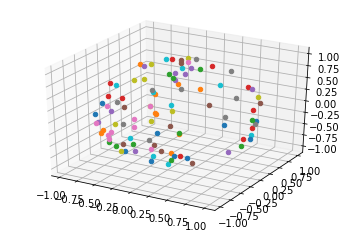

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d")

for i in range(100):
    ax1.scatter(*random_vector_on_unit_sphere())

In [9]:
def random_vector_on_hemisphere(normal):
    vec = random_vector_on_unit_sphere()
    if np.dot(vec, normal) < 0:
        return np.multiply(vec, -1)
    return vec

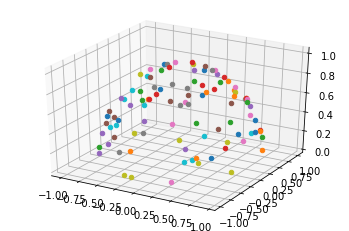

In [10]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")

for i in range(100):
    ax2.scatter(*random_vector_on_hemisphere([0, 0, 1]))

In [13]:
def random_vector_on_cone(normal, theta):
    normal = np.divide(normal, np.linalg.norm(normal))

    # generate a point on the spheres slice, with z = cos(theta)
    z = np.cos(theta * 2)

    phi = rand(1, 0, 2 * np.pi)[0]
    x = np.sqrt(1 - z * z) * np.cos(phi)
    y = np.sqrt(1 - z * z) * np.sin(phi)

    # rotate the point towards the north pole
    rotaxis = [np.sin(phi), -np.cos(phi), 0]

    # choose a random angle to rotate up by
    # it needs to be distributed so that more 
    # points dont end up near the north pole
    angle = 2 * theta * (1 - 2 * np.arccos(rand(1, 0, 1)[0]) / np.pi)
    rotaxis = np.multiply(rotaxis, angle)

    rotmatrix = R.from_rotvec(rotaxis).as_matrix()

    point = rotmatrix.dot([x, y, z])

    if normal[2] > 0.999999:
        return point
    
    if normal[2] < -0.999999:
        return np.multiply(point)

    # rotate the point towards the normal
    
    rotaxis2 = np.cross(normal, [0, 0, -1])
    rotaxis2 = np.divide(rotaxis2, np.linalg.norm(rotaxis2)) # normalize
    rotaxis2 = np.multiply(rotaxis2, np.arccos(normal[2]))

    rotmatrix2 = R.from_rotvec(rotaxis2).as_matrix()

    point = rotmatrix2.dot(point)

    return point


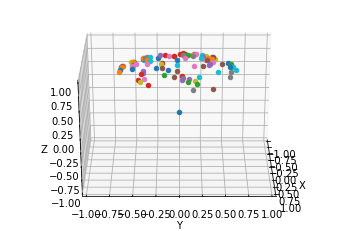

In [14]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection="3d")

ax3.view_init(elev=90, azim=0)

ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

ax3.set_xlim(-1, 1)
ax3.set_ylim(-1, 1)
ax3.set_zlim(-1, 1)

ax3.scatter(0, 0, 0)

for i in range(100):
    ax3.scatter(*random_vector_on_cone([0, 0, 1], np.pi / 8))